# Santander Customer Transaction Prediction

In [1]:
import pandas as pd
import numpy as np
import os
print(os.listdir("../input"))


['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('../input/train.csv')
data_pred=pd.read_csv('../input/test.csv')

In [4]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

No hay valores Null en ninguna de las variables

Target is a binary variable that indicates if the tansaction was made or not

In [5]:
c=data['target'].value_counts()
print('% of 0 ---> ', c[0]/(c[0]+c[1]))
print('% of 1 ---> ', c[1]/(c[0]+c[1]))

% of 0 --->  0.89951
% of 1 --->  0.10049


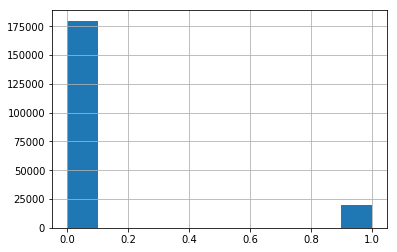

In [6]:
data['target'].hist()

# EDA

Box plot helps to understand the data distribution among the diferente Features, there are big data range defereences that could affect some algorithm trainings.

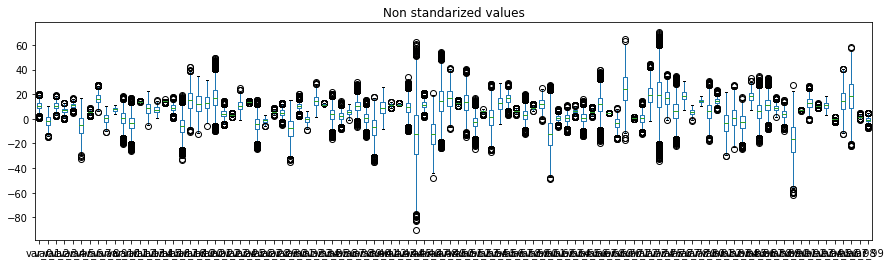

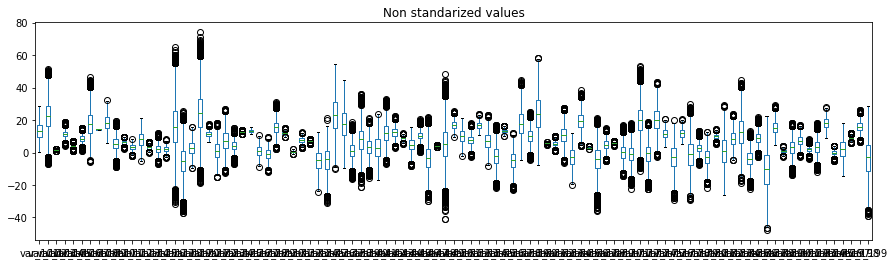

In [7]:
data[data.columns[2:102]].plot(kind='box', figsize=[15,4], title='Non standarized values')
data[data.columns[103:]].plot(kind='box', figsize=[15,4], title='Non standarized values')


In [8]:
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'density')

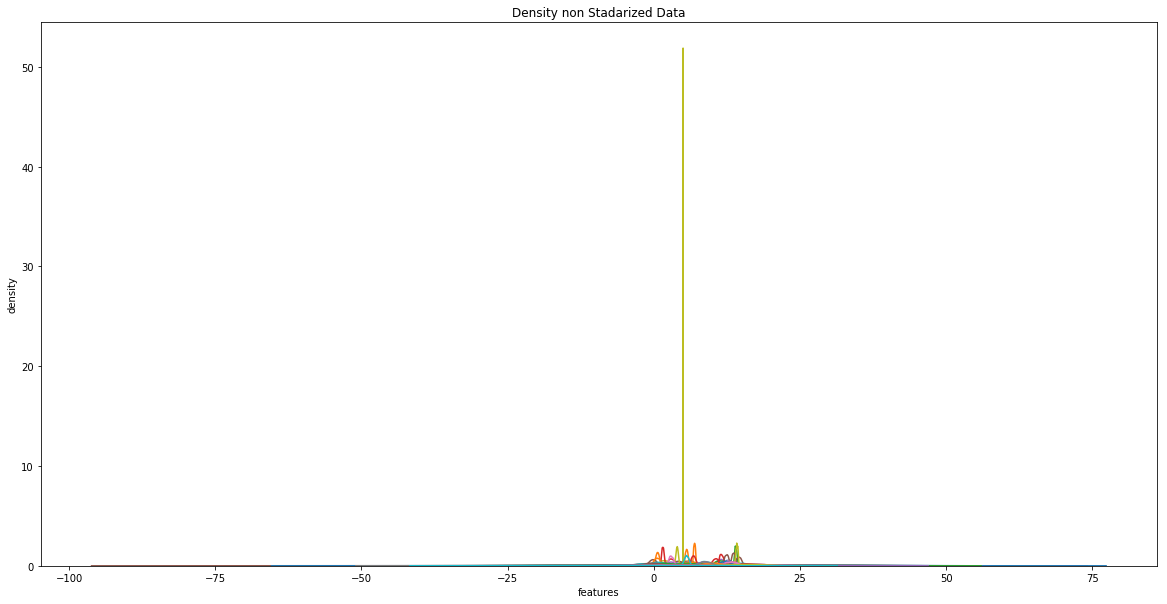

In [9]:
values=data.columns.drop(['ID_code', 'target'])
plt.figure(figsize=(20,10))
for val in values:
    sns.distplot(data[val], hist=False)

plt.title('Density non Stadarized Data')
plt.xlabel('features')
plt.ylabel('density')


In [10]:
val_max=pd.DataFrame(data=data.max(), columns=['max'])
val_max=val_max[2:]
val_max['var']=val_max.index
val_max[['var', 'max']].head()

,var,max
var_0,var_0,20.315
var_1,var_1,10.3768
var_2,var_2,19.353
var_3,var_3,13.1883
var_4,var_4,16.6714


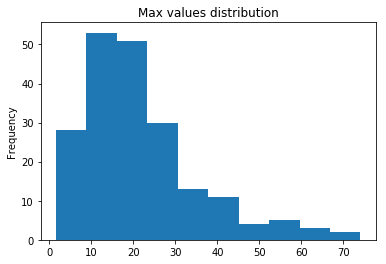

In [11]:
val_max['max'].plot(kind='hist', title='Max values distribution')

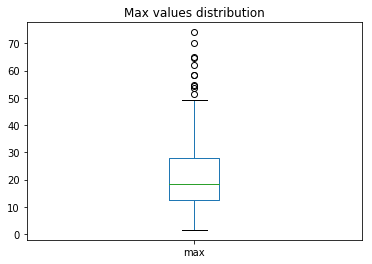

In [12]:
val_max['max'].plot(kind='box', title='Max values distribution')

In [13]:
data.kurt().head(10)
Kur_max=pd.DataFrame(data=(data.kurtosis()) , columns=['Kurtosis'])
Kur_max['var']=Kur_max.index
Kur_max.sort_values('Kurtosis', ascending=False).head()


,Kurtosis,var
target,5.063112,target
var_179,-0.013964,var_179
var_44,-0.096464,var_44
var_93,-0.152366,var_93
var_146,-0.168031,var_146


## Multicorrelation Analytic

In [14]:
features=data.drop(columns=['ID_code', 'target'])

In [15]:
correlations = data.corr().unstack().sort_values(ascending=True)


In [16]:
cor_abs=correlations.abs().reset_index()

In [17]:
cor_abs=cor_abs[cor_abs['level_0']!=cor_abs['level_1']]


In [18]:
cor_abs=cor_abs.set_axis(['level_0', 'level_1', 'cor'],axis=1, inplace=False)


In [19]:
cor_abs.tail(10)

,level_0,level_1,cor
40190,var_22,target,0.060558
40191,target,var_22,0.060558
40192,var_26,target,0.062422
40193,target,var_26,0.062422
40194,var_53,target,0.063399
40195,target,var_53,0.063399
40196,target,var_110,0.064275
40197,var_110,target,0.064275
40198,var_6,target,0.066731
40199,target,var_6,0.066731


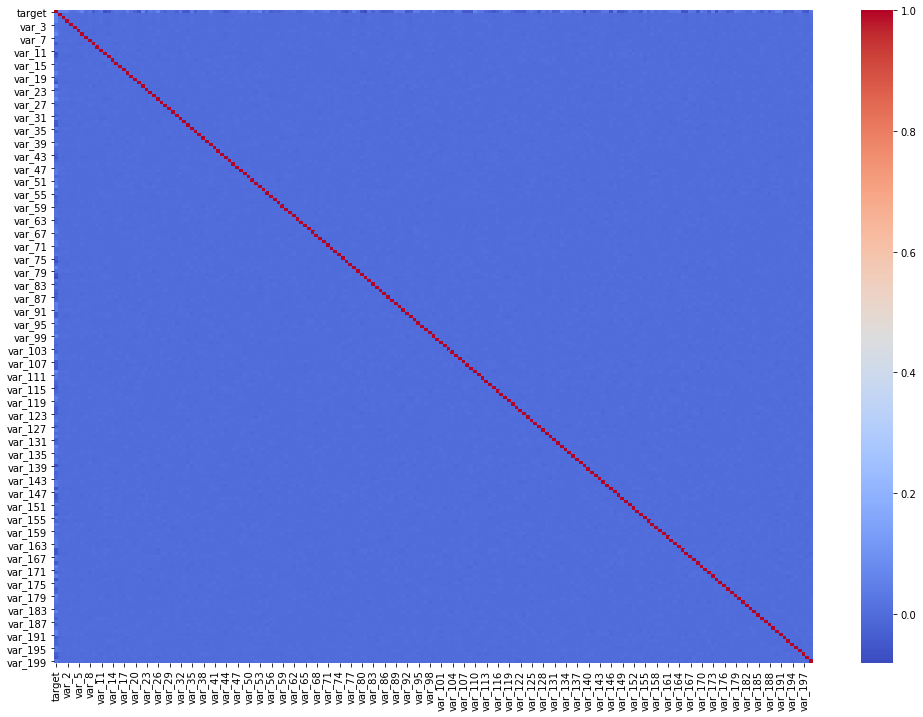

In [20]:
corr=data.corr()
plt.figure(figsize=(17,12))

sns.heatmap(corr, cmap='coolwarm')

# Train/Test Spliting

First I will split my data set into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train, test=train_test_split(data, test_size=0.25)

In [23]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
60657,train_60657,0,9.3075,0.2840,9.0673,4.8511,8.0238,1.1727,6.5567,14.9053,0.4884,5.5806,-3.5869,-1.2717,14.1455,-2.6201,7.6124,15.1884,6.3322,0.4753,5.3254,17.4565,15.4776,7.0277,0.0208,2.7638,18.7820,13.6599,-8.2010,-1.8680,5.2474,9.9358,-4.6146,6.0058,-0.7022,11.3367,10.9031,15.9578,0.4101,6.2567,...,42.0652,5.7949,3.6551,7.3855,-9.3524,26.1168,3.1627,-6.7400,2.4740,5.5172,2.7076,1.2102,13.2434,-1.7036,26.9199,14.0235,6.2173,16.2994,-13.8817,0.8501,3.6504,9.1203,-11.1496,11.9244,5.9826,-9.1553,10.8533,-14.9062,18.3031,1.0959,-1.7479,3.4474,3.0189,-0.6362,17.6625,1.2038,8.9475,6.7366,7.7296,14.6513
112721,train_112721,1,9.8926,1.2747,11.5556,3.9904,9.5687,-17.9023,6.3139,16.8758,-4.1319,8.0596,5.2600,7.8473,13.7363,14.5736,10.4678,14.4414,13.4008,-7.2006,25.0513,12.7633,18.7651,15.9070,9.0153,2.5324,11.3316,13.5225,-5.4799,-1.1493,3.9274,6.6891,-16.6776,6.1937,-2.8829,14.5827,11.4875,7.7125,2.2186,7.9520,...,12.8627,5.8069,7.8179,19.0379,4.8372,25.0491,3.0434,-4.0632,1.7068,5.6411,-0.0605,-0.6690,7.1241,4.0918,21.8839,12.8693,-3.4569,8.6526,-6.6337,1.7710,1.5208,11.0421,1.9310,4.5187,13.4842,-7.3187,7.6286,-4.2931,15.2417,-0.8159,-0.5822,4.4885,1.2590,11.1865,17.5674,1.4626,5.4687,8.6929,12.5138,-8.3162
173508,train_173508,0,8.6291,-4.1115,8.3374,8.7187,9.9712,6.3787,5.3820,19.1748,-2.5198,7.7911,10.0481,-9.2007,13.9507,10.7128,9.7805,14.7662,5.3192,-9.2929,3.2526,13.6909,16.9670,12.6542,3.6072,3.0819,13.4043,13.6500,-11.0724,-0.2989,6.4564,9.2858,-12.9440,11.2863,-2.3800,16.1259,12.1247,7.7820,5.5062,3.1277,...,19.0962,5.7889,6.3041,13.5637,-7.5514,28.0976,3.4870,-14.5692,5.7679,5.2730,-2.0904,5.5212,17.2165,9.1322,23.2242,4.5138,-1.6513,11.3788,-0.6310,2.4464,-2.9730,9.3181,-9.7220,4.3618,24.8981,-5.2659,9.1138,-6.6038,12.8494,0.0981,6.3955,3.5922,3.0291,-6.0681,13.0931,1.3334,11.5798,9.2766,13.9298,-14.4239
189797,train_189797,0,10.3178,-3.6459,9.0978,6.3172,11.7722,-21.5872,5.0994,15.4449,2.7134,8.9241,-3.9758,-8.6003,14.3397,4.5800,10.0849,14.5003,12.0833,0.7119,10.9234,-0.1884,6.2833,9.0684,1.5742,3.0028,9.8102,13.8948,-5.6334,0.3010,5.1547,7.1615,-4.9823,8.9734,3.2068,17.8256,10.3314,6.2537,-4.6916,7.7300,...,35.0367,5.3418,4.4805,23.4270,0.6434,13.7373,3.2733,-3.2979,6.4929,5.4564,-3.0326,0.5767,26.3315,10.4756,20.7000,5.6176,8.1168,13.3032,11.5427,0.3027,-10.5348,13.5292,0.7292,8.0306,-6.0403,-5.3799,3.8513,-2.2747,11.3222,0.8613,3.5386,6.3740,5.1292,6.3062,23.8653,-1.5037,10.7092,9.2175,18.0851,9.7473
29753,train_29753,0,8.6926,-6.1360,8.9418,9.7991,10.9427,-1.4607,4.6983,16.1254,-4.1056,6.8255,-1.0783,-9.7678,13.5727,-3.2423,8.7636,15.1584,14.1203,-6.3606,14.8214,8.5589,7.4353,20.6033,6.8484,2.6760,5.4426,13.5104,-0.6942,1.5314,4.2824,0.1575,-20.1113,12.5774,-2.6277,13.1522,10.6746,1.1658,2.5415,7.5288,...,30.5914,5.7223,4.2134,13.4846,1.0825,20.9412,2.5048,-18.3066,10.8642,6.1448,-2.3781,-5.3457,27.5205,-4.9083,21.7469,12.0625,-3.6336,14.1456,4.0045,3.8686,-0.9876,10.9839,6.3370,15.8574,31.1355,-6.0144,8.2830,-21.8292,10.7367,0.6363,-5.8950,9.4641,0.1195,3.4792,19.6562,-2.8680,1.5914,7.5515,16.0826,-2.2673


In [24]:
x=train[train.columns[2:202]]
y_train=train[train.columns[1:2]]

In [25]:
xt=test[test.columns[2:202]]
y_test=test[test.columns[1:2]]

# Data Standarization

In [26]:
from sklearn import preprocessing
std=preprocessing.StandardScaler()

In [27]:
x_names=x.columns

In [28]:
x_tr=std.fit_transform(x)
x_train=pd.DataFrame(x_tr, columns=x_names)

In [29]:
xts=std.fit_transform(xt)
x_test=pd.DataFrame(xts, columns=x_names)

## --- EDA Data Standarized vs Non Standarized

We very can verify how the distribution of the feature approaches each other, with similar data ranges and close to a normal data distribution

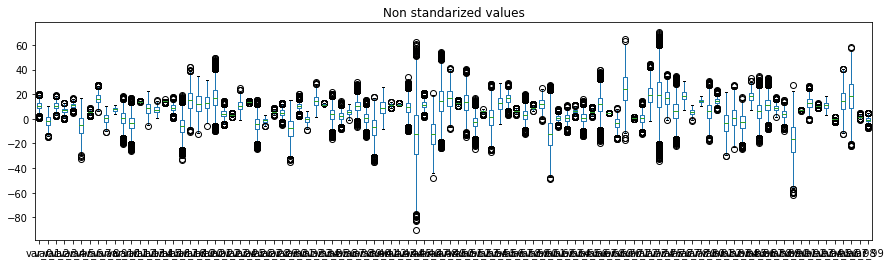

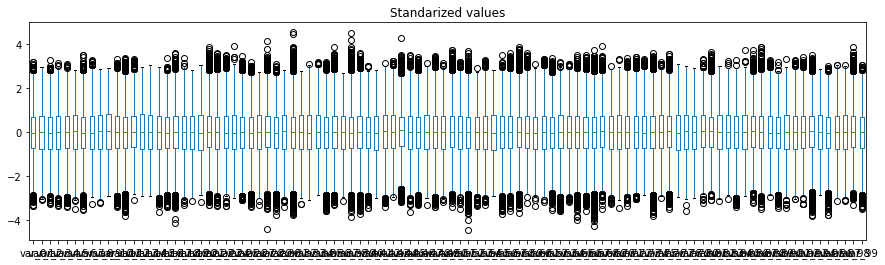

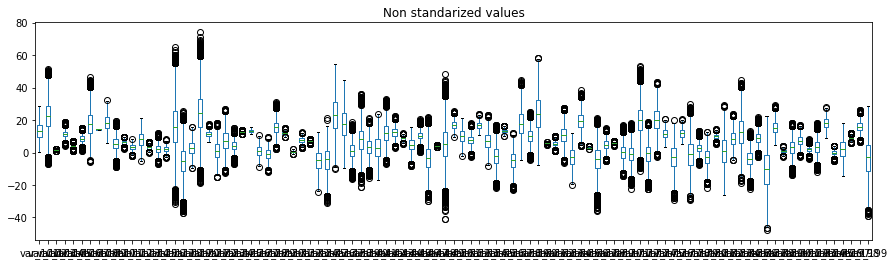

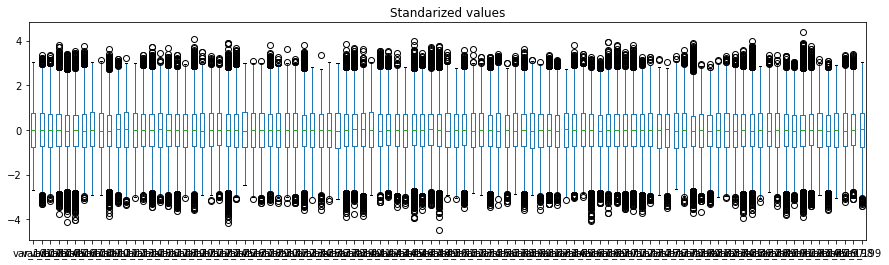

In [30]:
data[data.columns[2:102]].plot(kind='box', figsize=[15,4], title='Non standarized values')
x_train[x_train.columns[:100]].plot(kind='box', figsize=[15,4], title='Standarized values')
data[data.columns[103:]].plot(kind='box', figsize=[15,4], title='Non standarized values')
x_train[x_train.columns[101:]].plot(kind='box', figsize=[15,4], title='Standarized values')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'density')

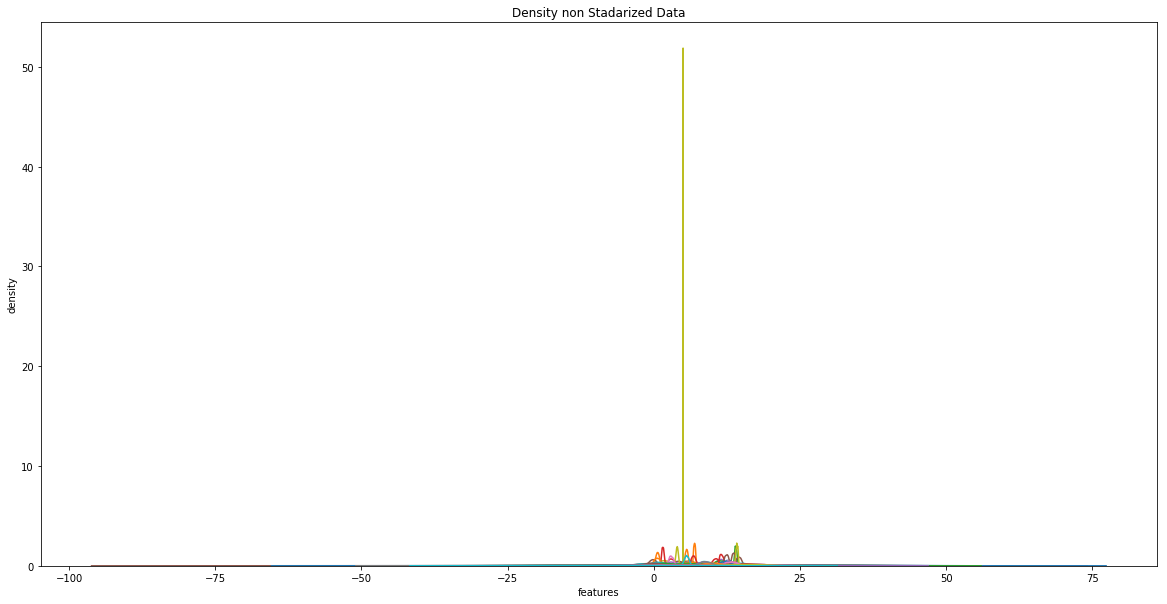

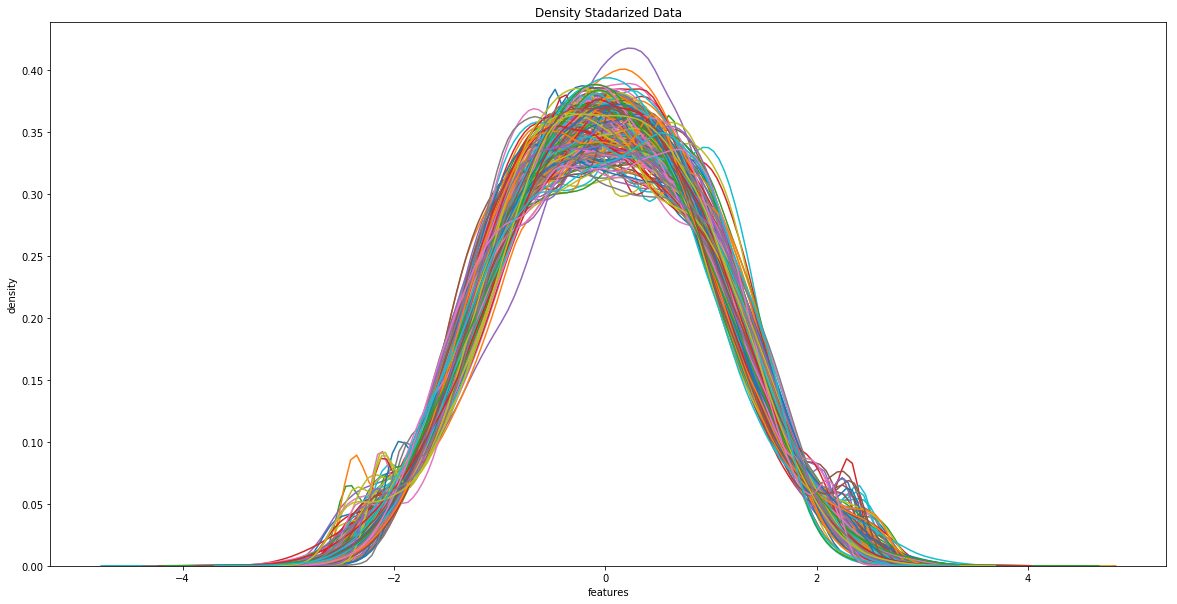

In [31]:
values=data.columns.drop(['ID_code', 'target'])
plt.figure(figsize=(20,10))
for val in values:
    sns.distplot(data[val], hist=False)
plt.title('Density non Stadarized Data')
plt.xlabel('features')
plt.ylabel('density')

plt.figure(figsize=(20,10))
for val in values:
    sns.distplot(x_train[val], hist=False)
plt.title('Density Stadarized Data')
plt.xlabel('features')
plt.ylabel('density')


# Features Selection.

Features selection is far from easy, as we demonstrated there isn't a correlation among variables.
I tried several methods to evaluate different possibilities of featuring reduction and as we will see none of them gives concluded results.

## PCA

In [34]:
from sklearn.decomposition import PCA
#import mglearn

In [35]:
array=x_train.values


In [36]:
pca=PCA(n_components=3)
pca.fit(array)
threeD=pca.transform(array)
threeD


array([[ 0.26254705,  1.51906906,  1.09215696],
       [ 0.73913495, -0.58286678, -0.26153219],
       [ 0.11564889, -0.07472385, -0.06605775],
       ...,
       [-0.33664616,  0.34393669,  1.6810657 ],
       [ 0.97862776,  1.11894373,  1.35394977],
       [-0.21327853, -0.95608635,  1.05230526]])

In [37]:
three_Df = pd.DataFrame(data = threeD, columns = ['PCA1', 'PCA2', 'PCA3']) 

In [38]:
df_pca = pd.concat([three_Df, y_train], axis = 1)

In [39]:
df_pca.head()

,PCA1,PCA2,PCA3,target
0,0.262547,1.519069,1.092157,0.0
1,0.739135,-0.582867,-0.261532,0.0
2,0.115649,-0.074724,-0.066058,0.0
3,-0.121402,0.035809,0.518055,0.0
4,0.034638,-1.131978,-0.111233,0.0


In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

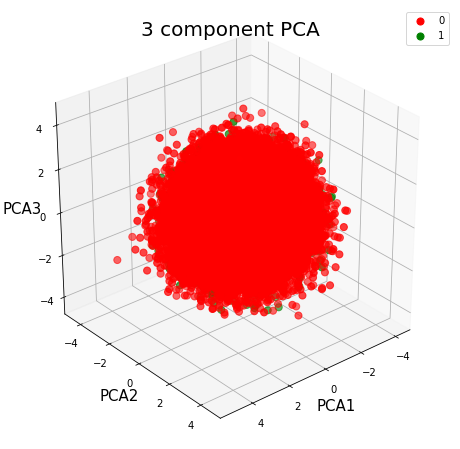

In [41]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_zlabel('PCA3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PCA1']
               , df_pca.loc[indicesToKeep, 'PCA2']
               , df_pca.loc[indicesToKeep, 'PCA3']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

ax.view_init(azim=50)

    


In [42]:
pca.explained_variance_ratio_

array([0.00570121, 0.00516667, 0.00514486])

That was something expected, the large number of features and the non-correlation. Dimensionality reduction to 3 var does not show any independent cluster of values.

## Forward Squential Feature Selector

I tried the forward Sequential Feature Selector with an iteration from 50 to 200 features, Unfortunately, the training process took hours without concluyentes results.



print('best combination (ACC: %.3f): %s\n' % (feature_selector.k_score_, feature_selector.k_feature_idx_))
print('all subsets:\n', feature_selector.subsets_)
plot_sfs(feature_selector.get_metric_dict(), kind='std_err');

## Lasso Regession an Features selection.

In [43]:
from sklearn.linear_model import Lasso

Alpha coeficiente evaluation for lasso regression. The Cross Validation algorithm GridSearchCV will iterate the Lasso algorith for diferent values of Alpha. In this case GridSearch will test a randon number of alpha values 

In [44]:
from scipy.stats import uniform

In [45]:
alphas=uniform.rvs(loc=0, scale=0.2, size=30)
alphas

array([0.0228833 , 0.10740896, 0.13003036, 0.19434678, 0.19587447,
       0.06145824, 0.01531347, 0.00145387, 0.03785551, 0.07560172,
       0.07538614, 0.15506009, 0.15793246, 0.13039176, 0.10134407,
       0.11625484, 0.1720884 , 0.09626833, 0.161619  , 0.01631277,
       0.10531454, 0.01085961, 0.07406023, 0.08010126, 0.10070563,
       0.10136089, 0.07556311, 0.09052451, 0.1111949 , 0.13860917])

I just keep the value of alphas bolcked copy/paste, if not each time we run uniform.rvs the alphas array will change and therefore the result for best alpha.

In [46]:
alphas=[0.12301225, 0.14288355, 0.18551073, 0.05006723, 0.0333933 ,
       0.03646111, 0.04268822, 0.10610886, 0.19878154, 0.01463984,
       0.09548202, 0.13826288, 0.12977404, 0.06173418, 0.09480236,
       0.15044969, 0.05521685, 0.00238981, 0.13915425, 0.15324187,
       0.18726584, 0.0666834 , 0.01948747, 0.02757435, 0.13793408,
       0.09817728, 0.02072232, 0.1429758 , 0.11844789, 0.04484972]

In [47]:
from sklearn.model_selection import GridSearchCV
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=dict(alpha=alphas), cv=10)

In [48]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.12301225, 0.14288355, 0.18551073, 0.05006723, 0.0333933, 0.03646111, 0.04268822, 0.10610886, 0.19878154, 0.01463984, 0.09548202, 0.13826288, 0.12977404, 0.06173418, 0.09480236, 0.15044969, 0.05521685, 0.00238981, 0.13915425, 0.15324187, 0.18726584, 0.0666834, 0.01948747, 0.02757435, 0.13793408, 0.09817728, 0.02072232, 0.1429758, 0.11844789, 0.04484972]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print('Best alpha--->', grid.best_params_)
print('Best score--->', grid.best_score_)

Best alpha---> {'alpha': 0.00238981}
Best score---> 0.17170589392016694


In [50]:
model_lasso=Lasso(alpha=0.00238981)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.00238981, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
lasso_cf=list(model_lasso.coef_)
feature_names=x_train.columns.values.tolist()
coef_lasso=pd.DataFrame({'feature': feature_names, 'Coef':lasso_cf})
features_filter=coef_lasso[coef_lasso['Coef']!=0]
features_sel=features_filter['feature'].tolist()
print(features_sel)
len(features_sel)


['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8', 'var_9', 'var_11', 'var_12', 'var_13', 'var_15', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_28', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_43', 'var_44', 'var_45', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_97', 'var_99', 'var_101', 'var_102', 'var_104', 'var_105', 'var_106', 'var_107', 'var_108', 'var_109', 'var_110', 'var_111', 'var_112', 'var_113', 'var_114', 'var_115', 'var_116', 'var_118', 'var_119', 'var_120', 'var_121', 'var_122'

164

#### Same Lasso Algorithm but with Non normalized features.

In [52]:
x=train[train.columns[2:102]]


In [53]:
grid.fit(x, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.12301225, 0.14288355, 0.18551073, 0.05006723, 0.0333933, 0.03646111, 0.04268822, 0.10610886, 0.19878154, 0.01463984, 0.09548202, 0.13826288, 0.12977404, 0.06173418, 0.09480236, 0.15044969, 0.05521685, 0.00238981, 0.13915425, 0.15324187, 0.18726584, 0.0666834, 0.01948747, 0.02757435, 0.13793408, 0.09817728, 0.02072232, 0.1429758, 0.11844789, 0.04484972]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
print('Best alpha--->', grid.best_params_)
print('Best score--->', grid.best_score_)

Best alpha---> {'alpha': 0.00238981}
Best score---> 0.09310031157226192


In [55]:
model_lasso=Lasso(alpha=0.00238981)
model_lasso.fit(x, y_train)

Lasso(alpha=0.00238981, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
lasso_cf=list(model_lasso.coef_)
feature_names=x.columns.values.tolist()
coef_lasso=pd.DataFrame({'feature': feature_names, 'Coef':lasso_cf})
features_filter=coef_lasso[coef_lasso['Coef']!=0]
features_sel=features_filter['feature'].tolist()
print(features_sel)
len(features_sel)

['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_69', 'var_70', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_99']


89

In [57]:
x_lasso_non=x_train[features_sel]
x_lasso_non.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_26,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_43,var_44,var_45,...,var_55,var_56,var_57,var_58,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_69,var_70,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_92,var_93,var_94,var_95,var_96,var_97,var_99
0,-0.450896,0.471948,-0.621543,-0.953364,-1.883944,0.792469,1.325833,0.063291,-1.611445,-0.723024,0.329930,0.639350,-2.402210,0.033621,-1.173161,0.919222,-1.263933,0.628006,0.372260,-1.246039,-1.502764,-0.484576,2.168669,-0.700663,-0.363361,1.862533,0.387248,-2.034252,-0.074005,-0.797036,-0.981970,2.337290,-0.567319,0.172542,0.897281,-0.274777,-0.885702,0.594690,-0.357121,0.633291,...,-0.618519,-0.046637,-0.294965,0.030758,0.695324,-1.641276,2.233253,-1.295353,-1.097230,-0.827579,0.504149,-1.164841,-0.919690,1.023111,-1.193255,-1.721445,-0.151626,1.605069,1.671920,-1.844926,0.194613,0.578855,0.445444,0.374751,0.328927,1.114594,-0.344719,0.010615,-2.223429,0.198938,-0.291906,-1.496581,1.636990,-0.965050,-0.488565,-0.048749,1.519072,-1.273012,-0.598754,-0.410581
1,-0.258305,0.716683,0.319891,-1.374501,-0.930878,-1.633174,1.045603,-1.323485,0.395755,0.885650,1.857572,-1.512947,1.300204,1.303536,1.595330,-0.223867,1.247652,0.040684,0.931916,-0.163462,1.654056,-0.924021,0.197060,-0.241430,-2.048932,0.622489,-1.128703,-1.947114,-0.917467,-0.046428,0.096361,0.745264,0.011936,0.926800,0.847320,-1.764054,-0.127538,-2.078096,-0.416289,-0.912638,...,-1.108043,-1.919788,1.006251,1.991867,-1.121061,-0.063754,-0.740611,0.565579,-0.385265,-0.532215,0.527868,1.359656,1.725730,1.083341,0.111716,1.209618,-1.148672,-0.323599,-0.035241,1.384045,-0.385513,-1.217694,0.482428,-1.553304,-0.118031,0.395452,-1.097745,-0.057983,-0.542179,-1.104340,0.531152,-0.949843,-0.838799,1.233562,2.497998,-1.671449,1.119195,-0.947079,-0.103089,-0.611728
2,-0.674198,-0.613882,-0.897697,0.939037,-0.682571,1.454482,-0.029958,-0.839616,0.178356,1.756293,-0.998360,-0.385253,0.468837,0.997865,-1.569913,-0.535451,-1.527851,0.156767,0.625812,-0.560048,-0.244037,0.119520,0.745561,-1.185261,1.180469,1.614273,-0.659503,0.414571,-0.722953,0.310423,1.272118,0.758684,1.064940,-1.219586,1.738415,0.138913,-1.960035,-0.795920,1.122129,-0.339065,...,0.216082,1.056382,0.274081,0.710502,-0.192005,-1.215403,0.674567,-0.305587,-0.849853,-1.303412,-0.721754,0.237149,-0.423231,-0.040461,-0.742727,0.259825,0.047088,0.322604,0.538510,-0.268515,-1.545263,-0.467469,0.148248,-0.374676,-1.022145,0.889232,-0.617582,1.503203,-0.256779,0.848165,1.284516,0.926122,1.319534,-1.185632,1.375967,-0.383183,1.265103,-1.177005,-0.239905,0.754987
3,-0.118346,-0.498864,-0.610004,-0.236007,0.428486,-2.101758,-0.356124,0.731122,1.095725,-0.793739,-0.897779,1.660797,-0.851773,1.133245,1.079317,0.954457,-0.551172,-1.580134,-1.192956,-0.997234,-0.957564,-0.030697,-0.205550,-0.267336,-0.481734,0.802918,0.341039,-0.658033,1.437938,0.703463,-2.036867,0.463595,-2.201372,0.828029,1.173121,1.226241,1.738356,-1.554963,-0.065051,-0.863533,...,1.176452,-1.677074,1.237469,-0.503235,-0.385594,-0.662525,-1.175917,-1.223178,-1.552680,0.986939,0.664030,-1.135816,0.266505,-0.608517,-0.881930,-1.946634,0.398664,-0.354098,0.652260,0.474929,0.511697,-1.554160,0.373549,-0.984051,0.918855,-0.195322,-1.506951,1.268736,0.227624,-0.113512,0.411945,0.886555,0.170561,0.307437,1.446612,0.839244,0.000410,2.257840,-0.827376,-0.523897
4,-0.653296,-1.113999,-0.669026,1.467673,-0.083242,0.457597,-0.819057,-1.315592,-0.603473,-0.266873,-1.093362,-2.373445,-2.536192,0.545607,1.877129,-0.098775,-0.054862,-0.485468,-0.996842,0.409118,0.893535,-0.651314,-1.361353,0.566240,-1.595616,-1.872189,-1.560214,1.013316,-0.818760,-0.377218,-1.403597,-0.518790,0.115359,0.738513,2.362582,-0.812828,-0.158590,-0.7949

In [58]:
xtest_lasso_non=x_test[features_sel]


## We have fiferent Feature data-sets to be tested

x_train and x_test ----> 200 features NORMALIZED

x_lasso_non and xtest_lasso_non ----> 87 features Non NORMALIZED following lasso reduction model of features

x_lasso and xtest_lasso ----> 87 features NORMALIZED

In [59]:
x_lasso=x_train[features_sel]
x_lasso.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_8',
       'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23',
       'var_24', 'var_26', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32',
       'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39',
       'var_40', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48',
       'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55',
       'var_56', 'var_57', 'var_58', 'var_60', 'var_61', 'var_62', 'var_63',
       'var_64', 'var_65', 'var_66', 'var_67', 'var_69', 'var_70', 'var_72',
       'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79',
       'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86',
       'var_87', 'var_88', 'var_89', 'var_90', 'var_92', 'var_93', 'var_94',
       'var_95', 'var_96', 'var_97', 'var_99'],
      dtype='object')

In [60]:
xtest_lasso=x_test[features_sel]


## Aplico Regresion logistica con las nuevas variables.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [62]:
log_reg=LogisticRegression()
log_reg1=LogisticRegression()
log_reg2=LogisticRegression()
log_reg3=LogisticRegression()


In [63]:
xtot_non=train[train.columns[2:202]]
xtot_non.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
60657,9.3075,0.2840,9.0673,4.8511,8.0238,1.1727,6.5567,14.9053,0.4884,5.5806,-3.5869,-1.2717,14.1455,-2.6201,7.6124,15.1884,6.3322,0.4753,5.3254,17.4565,15.4776,7.0277,0.0208,2.7638,18.7820,13.6599,-8.2010,-1.8680,5.2474,9.9358,-4.6146,6.0058,-0.7022,11.3367,10.9031,15.9578,0.4101,6.2567,14.4835,-0.4642,...,42.0652,5.7949,3.6551,7.3855,-9.3524,26.1168,3.1627,-6.7400,2.4740,5.5172,2.7076,1.2102,13.2434,-1.7036,26.9199,14.0235,6.2173,16.2994,-13.8817,0.8501,3.6504,9.1203,-11.1496,11.9244,5.9826,-9.1553,10.8533,-14.9062,18.3031,1.0959,-1.7479,3.4474,3.0189,-0.6362,17.6625,1.2038,8.9475,6.7366,7.7296,14.6513
112721,9.8926,1.2747,11.5556,3.9904,9.5687,-17.9023,6.3139,16.8758,-4.1319,8.0596,5.2600,7.8473,13.7363,14.5736,10.4678,14.4414,13.4008,-7.2006,25.0513,12.7633,18.7651,15.9070,9.0153,2.5324,11.3316,13.5225,-5.4799,-1.1493,3.9274,6.6891,-16.6776,6.1937,-2.8829,14.5827,11.4875,7.7125,2.2186,7.9520,14.2699,-6.5273,...,12.8627,5.8069,7.8179,19.0379,4.8372,25.0491,3.0434,-4.0632,1.7068,5.6411,-0.0605,-0.6690,7.1241,4.0918,21.8839,12.8693,-3.4569,8.6526,-6.6337,1.7710,1.5208,11.0421,1.9310,4.5187,13.4842,-7.3187,7.6286,-4.2931,15.2417,-0.8159,-0.5822,4.4885,1.2590,11.1865,17.5674,1.4626,5.4687,8.6929,12.5138,-8.3162
173508,8.6291,-4.1115,8.3374,8.7187,9.9712,6.3787,5.3820,19.1748,-2.5198,7.7911,10.0481,-9.2007,13.9507,10.7128,9.7805,14.7662,5.3192,-9.2929,3.2526,13.6909,16.9670,12.6542,3.6072,3.0819,13.4043,13.6500,-11.0724,-0.2989,6.4564,9.2858,-12.9440,11.2863,-2.3800,16.1259,12.1247,7.7820,5.5062,3.1277,18.0796,1.2200,...,19.0962,5.7889,6.3041,13.5637,-7.5514,28.0976,3.4870,-14.5692,5.7679,5.2730,-2.0904,5.5212,17.2165,9.1322,23.2242,4.5138,-1.6513,11.3788,-0.6310,2.4464,-2.9730,9.3181,-9.7220,4.3618,24.8981,-5.2659,9.1138,-6.6038,12.8494,0.0981,6.3955,3.5922,3.0291,-6.0681,13.0931,1.3334,11.5798,9.2766,13.9298,-14.4239
189797,10.3178,-3.6459,9.0978,6.3172,11.7722,-21.5872,5.0994,15.4449,2.7134,8.9241,-3.9758,-8.6003,14.3397,4.5800,10.0849,14.5003,12.0833,0.7119,10.9234,-0.1884,6.2833,9.0684,1.5742,3.0028,9.8102,13.8948,-5.6334,0.3010,5.1547,7.1615,-4.9823,8.9734,3.2068,17.8256,10.3314,6.2537,-4.6916,7.7300,15.6628,5.6467,...,35.0367,5.3418,4.4805,23.4270,0.6434,13.7373,3.2733,-3.2979,6.4929,5.4564,-3.0326,0.5767,26.3315,10.4756,20.7000,5.6176,8.1168,13.3032,11.5427,0.3027,-10.5348,13.5292,0.7292,8.0306,-6.0403,-5.3799,3.8513,-2.2747,11.3222,0.8613,3.5386,6.3740,5.1292,6.3062,23.8653,-1.5037,10.7092,9.2175,18.0851,9.7473
29753,8.6926,-6.1360,8.9418,9.7991,10.9427,-1.4607,4.6983,16.1254,-4.1056,6.8255,-1.0783,-9.7678,13.5727,-3.2423,8.7636,15.1584,14.1203,-6.3606,14.8214,8.5589,7.4353,20.6033,6.8484,2.6760,5.4426,13.5104,-0.6942,1.5314,4.2824,0.1575,-20.1113,12.5774,-2.6277,13.1522,10.6746,1.1658,2.5415,7.5288,20.7481,-2.6547,...,30.5914,5.7223,4.2134,13.4846,1.0825,20.9412,2.5048,-18.3066,10.8642,6.1448,-2.3781,-5.3457,27.5205,-4.9083,21.7469,12.0625,-3.6336,14.1456,4.0045,3.8686,-0.9876,10.9839,6.3370,15.8574,31.1355,-6.0144,8.2830,-21.8292,10.7367,0.6363,-5.8950,9.4641,0.1195,3.4792,19.6562,-2.8680,1.5914,7.5515,16.0826,-2.2673


In [64]:
log_reg.fit(xtot_non,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
log_reg1.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
log_reg2.fit(x_lasso , y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
log_reg3.fit(x_lasso_non , y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
y_pred=log_reg.predict(xt)

In [69]:
y_pred1=log_reg1.predict(x_test)

In [70]:
y_pred2=log_reg2.predict(xtest_lasso)

In [71]:
y_pred3=log_reg3.predict(xtest_lasso_non)

In [72]:
print('score of 200 features normalized----->', log_reg1.score(x_test,y_test))
print('score of 200 features NO normalized----->', log_reg.score(xt,y_test))

print('score of 48 features normalizer------>', log_reg2.score(xtest_lasso,y_test))
print('score of 48 features NO normalizer--->', log_reg3.score(xtest_lasso_non,y_test))

score of 200 features normalized-----> 0.915
score of 200 features NO normalized-----> 0.91484
score of 48 features normalizer------> 0.9034
score of 48 features NO normalizer---> 0.9034


In [73]:
conf_matrix1=confusion_matrix(y_test, y_pred1)
conf_matrix2=confusion_matrix(y_test, y_pred2)
conf_matrix3=confusion_matrix(y_test, y_pred3)

In [74]:
tp1=conf_matrix1[0,0]+conf_matrix1[1,1]
tp2=conf_matrix2[0,0]+conf_matrix2[1,1]
tp3=conf_matrix3[0,0]+conf_matrix3[1,1]
fp1=conf_matrix1[0,1]+conf_matrix1[1,0]
fp2=conf_matrix2[0,1]+conf_matrix2[1,0]
fp3=conf_matrix3[0,1]+conf_matrix3[1,0]

In [75]:
print('True predictions 200 features normalized---->',tp1)
print('True predictions 48 features normalized----->',tp2)
print('True predictions 48 features NO normalized-->',tp3)

print('False predictions 200 features normalized--->',fp1)
print('False predictions 48 features normalized---->',fp2)
print('False predictions 48 features NO normalized->',fp3)





True predictions 200 features normalized----> 45750
True predictions 48 features normalized-----> 45170
True predictions 48 features NO normalized--> 45170
False predictions 200 features normalized---> 4250
False predictions 48 features normalized----> 4830
False predictions 48 features NO normalized-> 4830


# Deep Learning con Keras

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as k
from tensorflow.keras.models import model_from_json





In [78]:
features=xtot_non.shape[1]

In [79]:
data=xtot_non.as_matrix()
lab=y_train.as_matrix()
label=to_categorical(lab)
data_test=xt.as_matrix()
lab_test=y_test.as_matrix()
label_test=to_categorical(lab_test)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [80]:
model=tf.keras.Sequential()
k.clear_session()

model.add(layers.Dense(400, activation='relu', input_shape=(features,)))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(data, label, epochs=25, batch_size=512)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
150000/150000 [==============================] - 3s 21us/sample - loss: 1.6265 - acc: 0.8973
Epoch 2/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 3/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 4/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 5/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 6/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 7/25
150000/150000 [==============================] - 3s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 8/25
150000/150000 [==============================] - 2s 17us/sample - loss: 1.6260 - acc: 0.8991
Epoch 9/25
150000/150000 [======================

In [81]:
model.evaluate(data_test, label_test, batch_size=512)

50000/50000 [==============================] - 0s 5us/sample - loss: 1.6008 - acc: 0.9007


[1.6008492916107178, 0.90068]

In [82]:
features1=x_train.shape[1]

In [83]:
data1=x_train.as_matrix()
lab=y_train.as_matrix()
label=to_categorical(lab)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [84]:
data1_test=x_test.as_matrix()
lab_test=y_test.as_matrix()
label_test=to_categorical(lab_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [85]:
model1=tf.keras.Sequential()

In [86]:
k.clear_session()

In [87]:
model1.add(layers.Dense(800, activation='relu', input_shape=(features1,)))
model1.add(layers.Dense(800, activation='relu'))
model1.add(layers.Dense(400, activation='relu'))
model1.add(layers.Dense(200, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

In [88]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [89]:
model1.fit(data1,label, epochs=300, batch_size=512)

Epoch 1/300
150000/150000 [==============================] - 3s 18us/sample - loss: 0.2534 - acc: 0.9071
Epoch 2/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.2314 - acc: 0.9152
Epoch 3/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.2193 - acc: 0.9193
Epoch 4/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.2014 - acc: 0.9268
Epoch 5/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.1744 - acc: 0.9369
Epoch 6/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.1438 - acc: 0.9481
Epoch 7/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.1116 - acc: 0.9595
Epoch 8/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0816 - acc: 0.9702
Epoch 9/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0561 - acc: 0.9794
Epoch 10/300
150000/150000 [===========================

150000/150000 [==============================] - 2s 17us/sample - loss: 0.0041 - acc: 0.9987
Epoch 79/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0031 - acc: 0.9990
Epoch 80/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0039 - acc: 0.9987
Epoch 81/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0038 - acc: 0.9988
Epoch 82/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0035 - acc: 0.9989
Epoch 83/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0044 - acc: 0.9984
Epoch 84/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0033 - acc: 0.9988
Epoch 85/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0031 - acc: 0.9989
Epoch 86/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0036 - acc: 0.9986
Epoch 87/300
150000/150000 [==============================]

150000/150000 [==============================] - 2s 17us/sample - loss: 0.0022 - acc: 0.9993
Epoch 155/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0025 - acc: 0.9992
Epoch 156/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0018 - acc: 0.9995
Epoch 157/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0012 - acc: 0.9996
Epoch 158/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0020 - acc: 0.9994
Epoch 159/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0017 - acc: 0.9995
Epoch 160/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0021 - acc: 0.9993
Epoch 161/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0017 - acc: 0.9994
Epoch 162/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0022 - acc: 0.9993
Epoch 163/300
150000/150000 [======================

150000/150000 [==============================] - 3s 17us/sample - loss: 0.0013 - acc: 0.9996
Epoch 231/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0016 - acc: 0.9995
Epoch 232/300
150000/150000 [==============================] - 3s 18us/sample - loss: 0.0013 - acc: 0.9996
Epoch 233/300
150000/150000 [==============================] - 3s 17us/sample - loss: 0.0011 - acc: 0.9996
Epoch 234/300
150000/150000 [==============================] - 2s 16us/sample - loss: 9.9275e-04 - acc: 0.9996
Epoch 235/300
150000/150000 [==============================] - 2s 16us/sample - loss: 7.6535e-04 - acc: 0.9998
Epoch 236/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0014 - acc: 0.9995
Epoch 237/300
150000/150000 [==============================] - 2s 17us/sample - loss: 0.0016 - acc: 0.9996
Epoch 238/300
150000/150000 [==============================] - 2s 16us/sample - loss: 0.0010 - acc: 0.9997
Epoch 239/300
150000/150000 [==============

In [90]:
model1.evaluate(data1_test, label_test, batch_size=512)

50000/50000 [==============================] - 0s 5us/sample - loss: 1.2244 - acc: 0.8971


[1.2243883433151246, 0.89712]

In [91]:
model_js=model1.to_json()
with open("model.json1", "w") as json_file:
    json_file.write(model_js)
# serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


#### MODEL2 trained with 48 features Normalized

In [92]:
features2=x_lasso.shape[1]

data2=x_lasso.as_matrix()
data2_test=xtest_lasso.as_matrix()

model2=tf.keras.Sequential()
k.clear_session()

model2.add(layers.Dense(400, activation='relu', input_shape=(features2,)))
model2.add(layers.Dense(400, activation='relu'))
model2.add(layers.Dense(200, activation='relu'))
model2.add(layers.Dense(100, activation='relu'))
model2.add(layers.Dense(2, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(data2, label, epochs=25, batch_size=512)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Epoch 1/25
150000/150000 [==============================] - 2s 12us/sample - loss: 0.2929 - acc: 0.8997
Epoch 2/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2787 - acc: 0.9025
Epoch 3/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2713 - acc: 0.9040
Epoch 4/25
150000/150000 [==============================] - 2s 11us/sample - loss: 0.2616 - acc: 0.9067
Epoch 5/25
150000/150000 [==============================] - 2s 11us/sample - loss: 0.2488 - acc: 0.9108
Epoch 6/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2302 - acc: 0.9166
Epoch 7/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2041 - acc: 0.9257
Epoch 8/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.1738 - acc: 0.9366
Epoch 9/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.1431 - acc: 0.9474
Epoch 10/25
150000/150000 [==============================] - 2s 

In [93]:
model2.evaluate(data2_test, label_test, batch_size=512)

50000/50000 [==============================] - 0s 4us/sample - loss: 0.9297 - acc: 0.8685


[0.9296920168685913, 0.86848]

In [94]:
model_js=model2.to_json()
with open("model.json2", "w") as json_file:
    json_file.write(model_js)
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


#### MODEL3 trained with 48 features NON Normalized

In [95]:
features3=x_lasso_non.shape[1]

data3=x_lasso_non.as_matrix()
data3_test=xtest_lasso_non.as_matrix()

model3=tf.keras.Sequential()
k.clear_session()

model3.add(layers.Dense(400, activation='relu', input_shape=(features3,)))
model3.add(layers.Dense(400, activation='relu'))
model3.add(layers.Dense(200, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
model3.add(layers.Dense(2, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(data3, label, epochs=25, batch_size=512)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Epoch 1/25
150000/150000 [==============================] - 2s 12us/sample - loss: 0.2945 - acc: 0.8988
Epoch 2/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2787 - acc: 0.9023
Epoch 3/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2712 - acc: 0.9045
Epoch 4/25
150000/150000 [==============================] - 2s 11us/sample - loss: 0.2613 - acc: 0.9073
Epoch 5/25
150000/150000 [==============================] - 2s 11us/sample - loss: 0.2474 - acc: 0.9119
Epoch 6/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2284 - acc: 0.9168
Epoch 7/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.2034 - acc: 0.9250
Epoch 8/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.1746 - acc: 0.9354
Epoch 9/25
150000/150000 [==============================] - 2s 10us/sample - loss: 0.1440 - acc: 0.9461
Epoch 10/25
150000/150000 [==============================] - 2s 

In [96]:
model3.evaluate(data3_test, label_test, batch_size=512)

50000/50000 [==============================] - 0s 4us/sample - loss: 0.9915 - acc: 0.8696


[0.9914650552368164, 0.86962]

prediction3=model3.predict(data3_test, batch_size=256)

In [97]:
model_js=model3.to_json()
with open("model.json3", "w") as json_file:
    json_file.write(model_js)
# serialize weights to HDF5
model3.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier as rfc
model=rfc(n_jobs=2, random_state=0)
model.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Fitting nomalized data -----> x_train, y_train, x_test

In [99]:
x_train.shape

(150000, 200)

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, model.predict(x_train))

0.9852

Very poor accuracy I will not use random forest

In [101]:
y_pred=model.predict(xt)
accuracy_score(y_test, y_pred)

0.29988

# Final Conclusion

After several attempts over different model algorithms feeding with a combination of data sets, we didn't get a relevant variation of accuracy during the valuation process. The best accuracy refers to the simplest model, a logistic regression trained wit 200 normalized features.

In [102]:

x_pred=data_pred[data_pred.columns[1:201]]
x_var=x_pred.columns

In [103]:

x_norm=std.fit_transform(x_pred)
x_norm=pd.DataFrame(x_norm, columns=x_var)

In [104]:
prediction=log_reg1.predict(x_norm)

In [105]:
prediction=pd.DataFrame(data=prediction , columns=['target'])
prediction.head()

,target
0,0
1,0
2,0
3,0
4,0


In [106]:
ID_code=[]

for i in range(len(prediction)):
    s=str(i)
#    t=str(prediction[i])
    line='test_'+s
    ID_code.append(line)
    

In [107]:
ID=pd.DataFrame(data=ID_code, columns=['ID_code'])

In [108]:
ID.head()

,ID_code
0,test_0
1,test_1
2,test_2
3,test_3
4,test_4


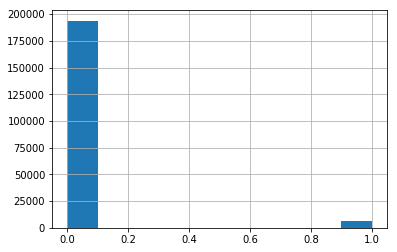

In [109]:
ID['target']=prediction.target
ID['target'].hist()

In [110]:
p=ID['target'].value_counts()
print('% of 0 ---> ', p[0]/(p[0]+p[1]))
print('% of 1 ---> ', p[1]/(p[0]+p[1]))

% of 0 --->  0.96915
% of 1 --->  0.03085


In [111]:
ID.to_csv('submission.csv', index=False)